In [4]:
# Data Preprocessing Libraries
import pandas as pd
from pandas_gbq import read_gbq
import numpy as np
import dotenv
import ast
from collections import defaultdict
import platform

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Ignore warnings
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="n_jobs value")

# 시스템에 따라 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':  # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
else:  # Linux (Colab 포함)
    plt.rcParams['font.family'] = 'NanumGothic'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [5]:
# BigQuery에 업로드된 데이터 불러오기 (pandas)
def load_data_from_bigquery(query):
    try:
        df = read_gbq(query,
                      project_id=dotenv.get_key(dotenv.find_dotenv(), "GOOGLE_PROJECT_ID"),
                      dialect='standard'
                      )
        return df
    except Exception as e:
        print(f"Error loading data from BigQuery: {e}")
        return None

질문 사항

- 투표에 참여한 학교가 몇 개인지?
- 투표에 참여한 사람이 몇 명인지?

질문에 대한 조건
- 2023년 5월 ~ 2023년 7월까지

In [6]:
# 공통 조건 :2023년 5월 ~ 2023년 7월
where_query = "WHERE created_at < '2023-08-01' AND created_at >= '2023-05-01'"

# 유저 테이블
accounts_user_df = load_data_from_bigquery(f"SELECT * FROM votes.accounts_user {where_query};")      
display(accounts_user_df)

# 학교 테이블
accounts_school_df = load_data_from_bigquery("SELECT * FROM votes.accounts_school;")  
display(accounts_school_df)

# 학급 테이블
accounts_group_df = load_data_from_bigquery("SELECT * FROM votes.accounts_group;")    
display(accounts_group_df)

# 투표 기록 테이블
accounts_userquestionrecord_df = load_data_from_bigquery(f"SELECT * FROM votes.accounts_userquestionrecord {where_query};")
display(accounts_userquestionrecord_df)

Downloading: 100%|██████████|


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,855179,0,0,M,1358,"[849767, 850569, 857770, 856249, 850108, 869470]",1,2023-05-18 16:36:23.667542,[],[],N,0,1,0,23,5532.0
1,862517,0,0,F,1391,"[880775, 838285, 868495, 875156, 838421, 83842...",1,2023-05-01 00:00:12.942200,[],[],N,0,1,0,19,6337.0
2,862518,0,0,F,1063,"[857473, 846981, 860934, 858247, 859913, 86901...",1,2023-05-01 00:00:22.647793,[],[],N,0,0,0,61,7020.0
3,862519,0,0,F,2137,"[1215494, 1150344, 1520776, 1160844, 1090445, ...",0,2023-05-01 00:00:32.161347,[],[],N,0,2,0,180,7392.0
4,862520,0,0,M,2838,"[874368, 856706, 1407234, 982788, 1145859, 100...",1,2023-05-01 00:00:48.974195,[],[],N,0,1,0,190,3526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654086,1579640,0,0,M,366,"[1519483, 1522180, 1535237, 1544166, 875815, 1...",1,2023-07-31 16:40:15.522415,[],[],N,0,1,0,0,81557.0
654087,1579641,0,0,M,519,"[1001084, 1160516, 1020645, 1013905, 1004146, ...",1,2023-07-31 16:48:48.598009,[],[],N,0,1,0,0,32088.0
654088,1579642,0,0,M,545,"[983683, 1001223, 1336712, 1330442, 1377420, 1...",0,2023-07-31 16:52:27.877076,[],[],N,0,1,0,0,10260.0
654089,1579643,0,0,F,311,[1503084],0,2023-07-31 17:48:00.152054,[],[],N,0,1,0,1,28720.0


Downloading: 100%|██████████|


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,6,충청북도 충주시,200,H
2,7,충청북도 충주시,114,H
3,13,충청북도 충주시,80,H
4,16,충청북도 충주시,143,H
...,...,...,...,...
5946,4971,경기도 안성시,155,M
5947,5025,경기도 안산시 단원구,155,M
5948,5063,경기도 시흥시,155,M
5949,5336,경기도 부천시,155,M


Downloading: 100%|██████████|


,id,grade,class_num,school_id
0,1,1,1,1
1,227,1,20,1
2,660,1,7,1
3,1184,1,5,1
4,1191,1,8,1
...,...,...,...,...
84510,73315,3,1,5961
84511,82152,3,1,5963
84512,84171,3,1,5965
84513,32644,4,10,4658


Downloading: 100%|██████████|


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,1503745,I,2023-05-01 04:52:05,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3
1,1548731,I,2023-05-01 07:22:18,850031,147,850736,1959508,1,N,2023-05-01 07:22:18,0,3
2,1664735,I,2023-05-01 11:59:48,858253,241,857101,2130014,1,N,2023-05-01 11:59:48,0,3
3,1681510,I,2023-05-01 12:31:28,863409,143,855748,2106132,1,N,2023-05-01 12:31:28,0,3
4,1687297,I,2023-05-01 12:42:48,856172,228,857422,2153384,1,N,2023-05-01 12:42:48,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1181413,160053225,I,2023-07-27 02:24:28,1037925,3214,1019885,196379884,1,N,2023-07-27 02:24:28,0,2
1181414,160068408,I,2023-07-27 09:37:57,1154274,2702,1210380,192436639,1,N,2023-07-27 09:37:57,0,2
1181415,160115151,I,2023-07-28 07:59:41,1169212,1465,1256702,93329166,1,N,2023-07-28 07:59:41,0,2
1181416,160214578,I,2023-07-30 09:02:19,883391,593,1302677,206061159,1,N,2023-07-30 09:02:19,0,2


In [7]:
# 겹치는 ID 값만 확인
pd.merge(
    accounts_user_df,
    accounts_userquestionrecord_df[['user_id']],
    how='inner',
    left_on='id',
    right_on='user_id'
).drop_duplicates(subset='id')

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,user_id
0,862583,0,0,F,1050,"[1122820, 1137670, 1131024, 1143832, 1154585, ...",0,2023-05-01 00:36:27.716442,[],[],N,0,1,0,265,7399.0,862583
266,862947,0,0,M,288,"[1116167, 855054, 1046542, 1130525, 840223, 92...",1,2023-05-01 03:07:39.655072,[],[],N,0,1,0,0,5028.0,862947
528,863069,0,0,F,1561,"[851590, 850695, 850057, 850186, 851219, 84994...",1,2023-05-01 03:45:13.061204,[],[],N,0,0,0,0,757.0,863069
600,863154,0,0,F,1443,"[855810, 862210, 842888, 858760, 861710, 85569...",1,2023-05-01 04:10:12.934776,[],[],N,0,1,0,53,5516.0,863154
604,863160,0,0,F,1299,"[862215, 872459, 858763, 860560, 864660, 85980...",1,2023-05-01 04:11:19.464300,[],[],N,0,0,0,64,5691.0,863160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098112,1577436,0,0,F,354,"[1018080, 1014562, 1114953, 939852, 1146188, 1...",0,2023-06-29 08:03:16.561688,[],[937132],N,0,1,0,0,34351.0,1577436
1098118,1577437,0,0,F,1635,"[928770, 1053832, 886028, 909198, 885263, 8862...",1,2023-06-29 08:03:21.082338,[],[],N,0,0,1,0,9568.0,1577437
1098165,1577440,0,0,M,425,"[885377, 870402, 886532, 891143, 1329673, 9947...",1,2023-06-29 08:36:52.982230,[],[],N,0,0,0,0,8323.0,1577440
1098177,1578095,0,0,F,270,"[915713, 879364, 888976, 865425, 890771, 87861...",1,2023-07-11 13:25:58.942235,[],[],N,0,0,0,0,1058.0,1578095


In [8]:
print(accounts_user_df.nunique())

id                    654091
is_superuser               1
is_staff                   1
gender                     2
point                  14156
friend_id_list        652192
is_push_on                 2
created_at            654088
block_user_id_list     11352
hide_user_id_list      72175
ban_status                 4
report_count              35
alarm_count               53
pending_chat              47
pending_votes           1182
group_id               79608
dtype: int64


In [9]:
print(accounts_userquestionrecord_df.nunique())

id                   1181418
status                     3
created_at            883576
chosen_user_id         15346
question_id             4610
user_id                 4835
question_piece_id    1181418
has_read                   2
answer_status              3
answer_updated_at     882697
report_count               8
opened_times               4
dtype: int64


In [10]:
daily_question_count = (
    accounts_userquestionrecord_df
    .assign(date=accounts_userquestionrecord_df['created_at'].dt.date)
    .groupby('date')
    .size()
)

# 날짜 단위로 변환
accounts_userquestionrecord_df['date'] = accounts_userquestionrecord_df['created_at'].dt.date

# 날짜별 중복 유저 제거 후 유저 수 계산
daily_user_count = (
    accounts_userquestionrecord_df
    .drop_duplicates(subset=['user_id', 'date'])  # 같은 날 같은 유저는 1회로 간주
    .groupby('date')['user_id']
    .nunique()
)

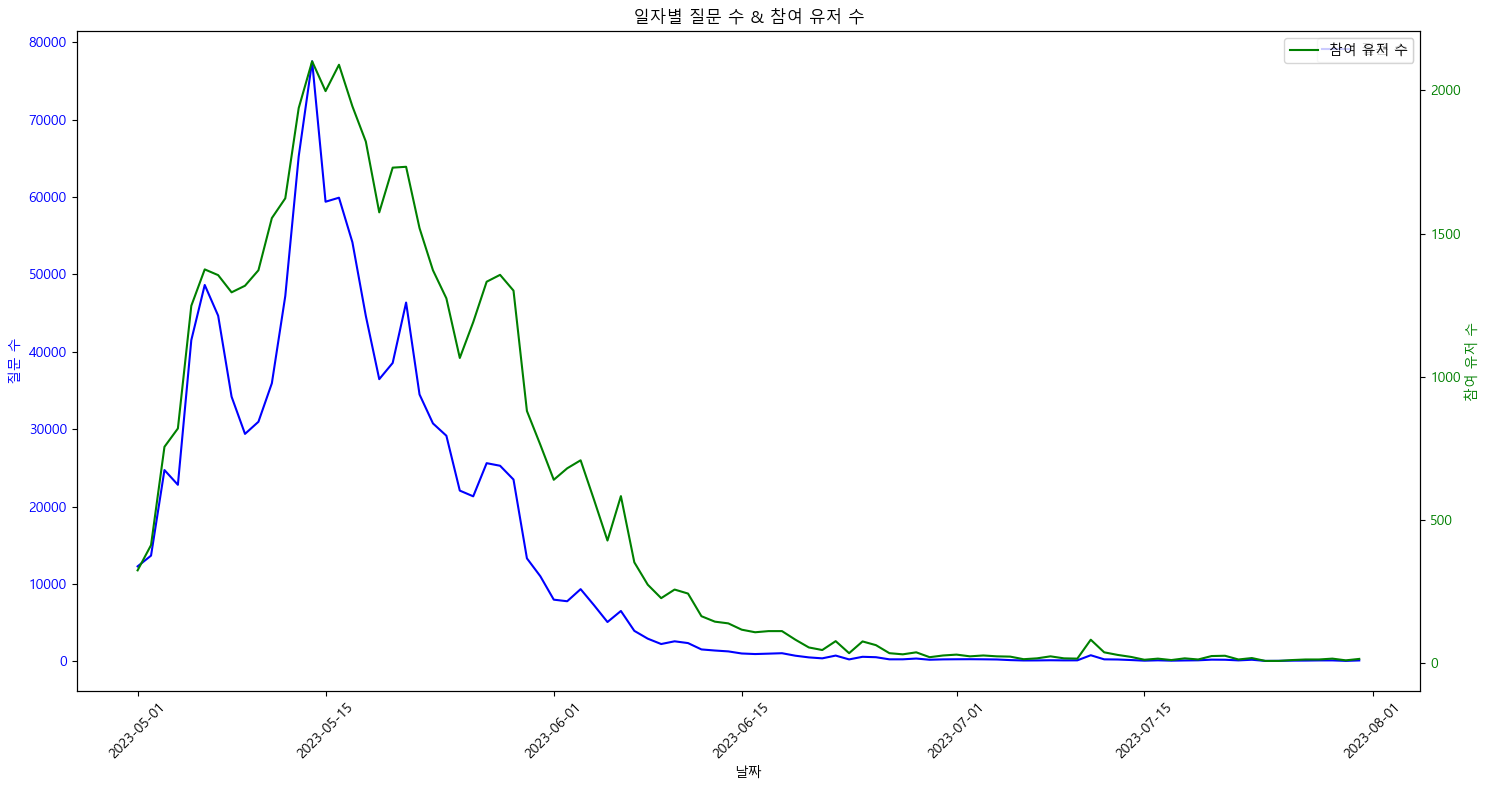

In [11]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# 첫 번째 y축 (질문 수)
sns.lineplot(x=daily_question_count.index, y=daily_question_count.values, ax=ax1, label='질문 수', color='blue')
ax1.set_ylabel("질문 수", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축 (참여 유저 수)
ax2 = ax1.twinx()
sns.lineplot(x=daily_user_count.index, y=daily_user_count.values, ax=ax2, label='참여 유저 수', color='green')
ax2.set_ylabel("참여 유저 수", color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 공통 설정
ax1.set_title("일자별 질문 수 & 참여 유저 수")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()


# **어떤 질문에 가장 많이 참여했는가?**

사람이 가장 많이 참여했던 2023년 5월부터 2023년 7월까지의 데이터를 기반으로 어떤 질문에 가장 많이 참여했는지 알아보기!

In [12]:
# 공통 조건 :2023년 5월 ~ 2023년 7월
where_query = "WHERE created_at < '2023-08-01' AND created_at >= '2023-05-01'"

# 투표 기록 테이블
accounts_userquestionrecord_df = load_data_from_bigquery(f"SELECT * FROM votes.accounts_userquestionrecord {where_query};")
display(accounts_userquestionrecord_df)

# 질문 테이블
polls_question_df = load_data_from_bigquery("SELECT * FROM votes.polls_question_add_category;")
display(polls_question_df)

Downloading: 100%|██████████|


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,1503745,I,2023-05-01 04:52:05,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3
1,1548731,I,2023-05-01 07:22:18,850031,147,850736,1959508,1,N,2023-05-01 07:22:18,0,3
2,1664735,I,2023-05-01 11:59:48,858253,241,857101,2130014,1,N,2023-05-01 11:59:48,0,3
3,1681510,I,2023-05-01 12:31:28,863409,143,855748,2106132,1,N,2023-05-01 12:31:28,0,3
4,1687297,I,2023-05-01 12:42:48,856172,228,857422,2153384,1,N,2023-05-01 12:42:48,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1181413,160053225,I,2023-07-27 02:24:28,1037925,3214,1019885,196379884,1,N,2023-07-27 02:24:28,0,2
1181414,160068408,I,2023-07-27 09:37:57,1154274,2702,1210380,192436639,1,N,2023-07-27 09:37:57,0,2
1181415,160115151,I,2023-07-28 07:59:41,1169212,1465,1256702,93329166,1,N,2023-07-28 07:59:41,0,2
1181416,160214578,I,2023-07-30 09:02:19,883391,593,1302677,206061159,1,N,2023-07-30 09:02:19,0,2


Downloading: 100%|██████████|


,id,question_text,created_at,category
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53,"[연애, 성격, 감성]"
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53,"[심리, 상상, 인간관계]"
2,101,미래의 틱톡커는?,2023-03-31 15:22:54,"[미디어, 미래, 상상]"
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54,"[성격, 관찰, 인간관계]"
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55,"[심리, 일상, 인간관계]"
...,...,...,...,...
5020,5129,나에게 가장 중요한 사람은?,2023-06-06 06:15:52,"[심리, 일상, 인간관계]"
5021,5130,오목을 제일 잘 할 것 같은 사람은?,2023-06-06 06:15:52,"[일상, 지식, 관찰]"
5022,5131,가방에서 쓰레기가 안 나올 것 같은 사람은?,2023-06-06 06:15:52,"[일상, 성격, 관찰]"
5023,5132,아무리 많은 숙제도 30분만에 다 끝내버릴 수 있을 것 같은 친구는?,2023-06-06 06:15:52,"[일상, 성격, 관찰]"


,question_id,count,question_text,category
0,170,1837,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,"[성격, 대화, 인간관계]"
1,169,1837,축제에서 공연을 제일 잘 할거 같은 사람은?,"[일상, 스타일, 관찰]"
2,211,1833,앞으로의 인생을 가장 재미있게 살것 같은 사람은?,"[미래, 상상, 라이프스타일]"
3,186,1816,vote,"[일상, 관찰, 미디어]"
4,290,1796,모든 사람과 잘 지낼 것 같은 사람은?,"[성격, 대화, 인간관계]"
...,...,...,...,...
4605,4693,1,옷 잘 입을 수 있게 도와줄 것 같은 친구,"[일상, 스타일, 인간관계]"
4606,4692,1,올해 안에 솔로탈출할 것 같은 사람은?,"[연애, 미래, 심리]"
4607,4164,1,같이 도서관 가고 싶은 사람은?,"[일상, 대화, 인간관계]"
4608,4385,1,초콜릿 사줄 것 같은 친구,"[일상, 감성, 인간관계]"


Text(0.5, 1.0, '2023년 5월 ~ 2023년 7월 가장 참여가 많았던 상위 20개 질문은?')

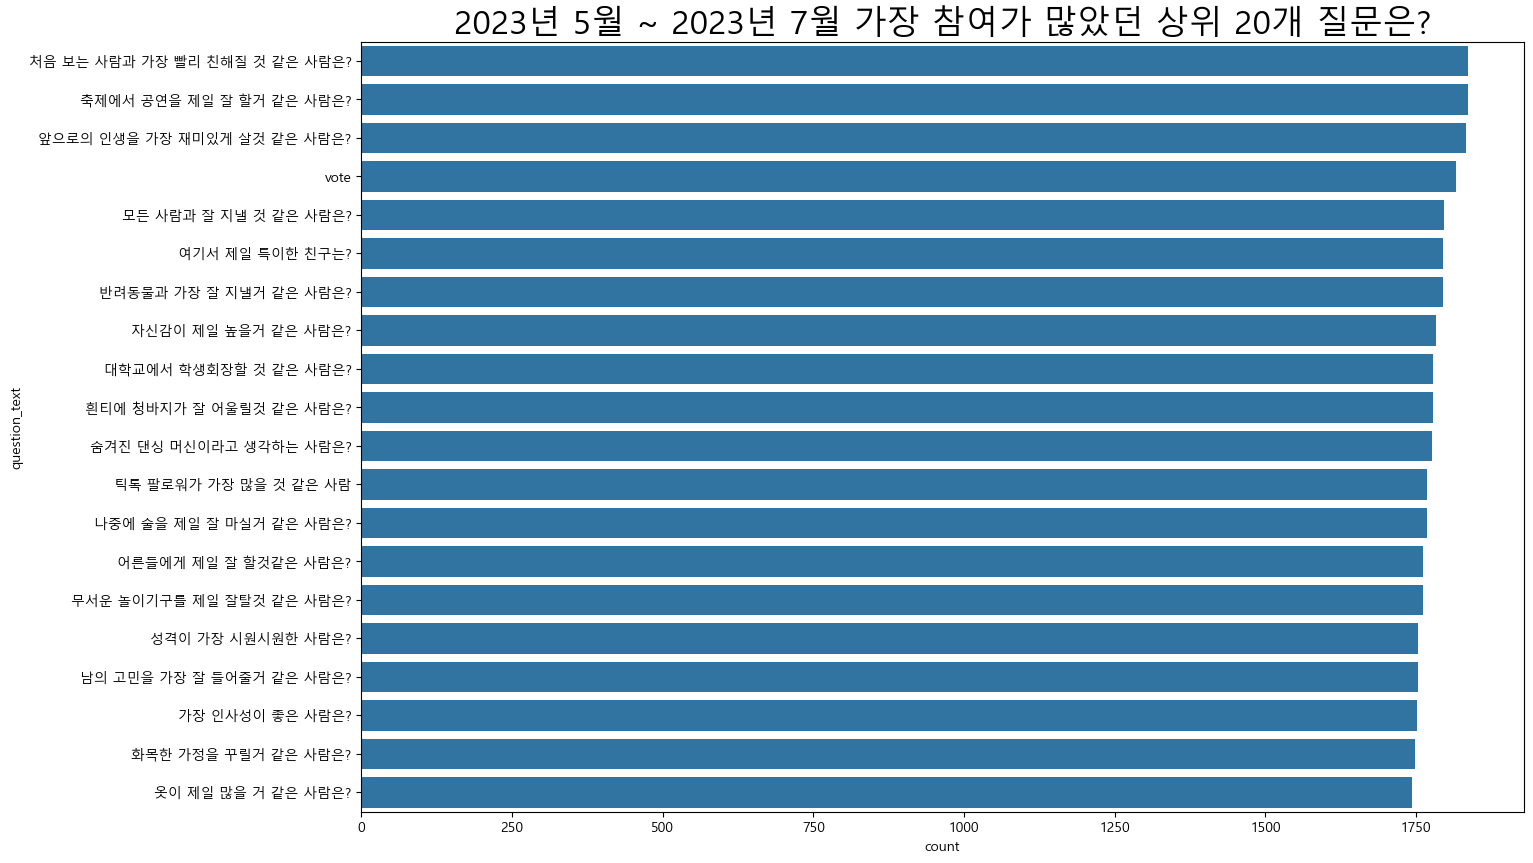

In [13]:
# 가장 참여가 많이 된 질문은?
favorite_votes = pd.merge(
    accounts_userquestionrecord_df[['question_id']].value_counts().reset_index(name='count'),
    polls_question_df[['id', 'question_text', 'category']],
    how='left',
    left_on='question_id',
    right_on='id'
).drop(labels='id', axis=1)

display(favorite_votes)

# 상위 20개를 bar graph로 출력
plt.figure(figsize=(15, 10))
sns.barplot(data=favorite_votes.head(20), x='count', y='question_text')
plt.title("2023년 5월 ~ 2023년 7월 가장 참여가 많았던 상위 20개 질문은?", fontsize=24)

# **질문의 카테고리 중에서 가장 인기가 많았던 카테고리는?**

In [14]:
favorite_votes = favorite_votes.explode(column='category')
display(favorite_votes)

,question_id,count,question_text,category
0,170,1837,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,성격
0,170,1837,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,대화
0,170,1837,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,인간관계
1,169,1837,축제에서 공연을 제일 잘 할거 같은 사람은?,일상
1,169,1837,축제에서 공연을 제일 잘 할거 같은 사람은?,스타일
...,...,...,...,...
4608,4385,1,초콜릿 사줄 것 같은 친구,감성
4608,4385,1,초콜릿 사줄 것 같은 친구,인간관계
4609,4279,1,하복이 제일 잘 어울리는사람!,일상
4609,4279,1,하복이 제일 잘 어울리는사람!,스타일


In [15]:
favorite_category = favorite_votes.groupby('category').agg(total_count = ('count', 'sum')).reset_index()
display(favorite_category)

,category,total_count
0,감성,181135
1,건강,371
2,관계,30
3,관찰,346137
4,기억,1635
5,대화,101545
6,라이프스타일,121005
7,미디어,48374
8,미래,132998
9,미식,46


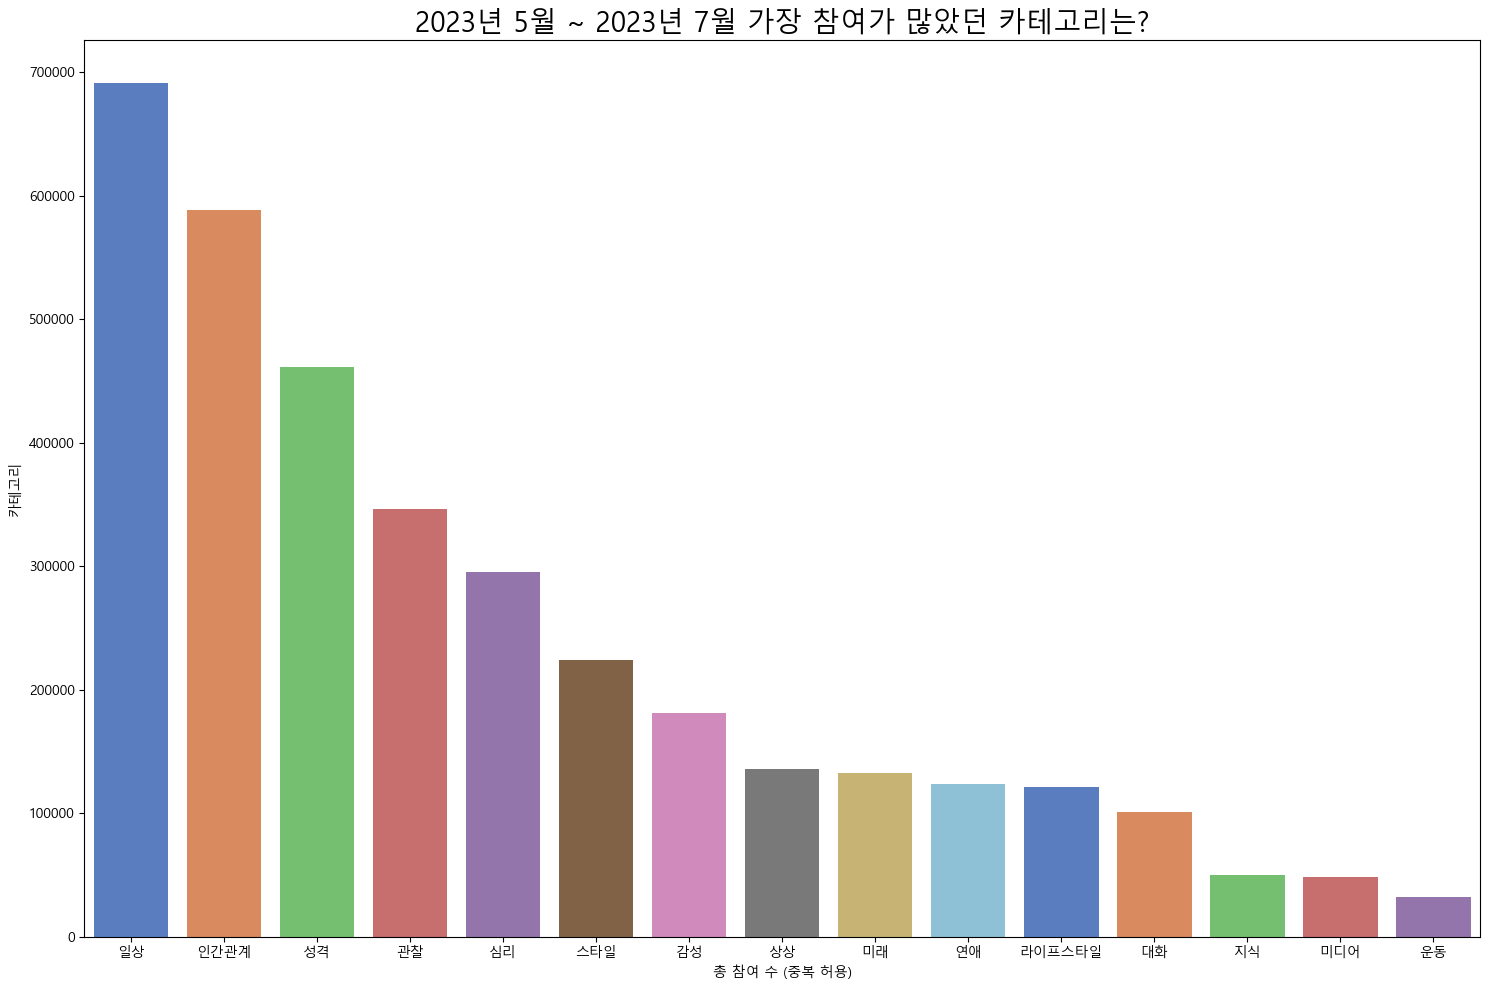

In [16]:
# 상위 20개를 bar graph로 출력
plt.figure(figsize=(15, 10))
sns.barplot(data=favorite_category.sort_values(by='total_count', ascending=False).head(15),
            x='category',
            y='total_count',
            palette='muted',
            legend=False)
plt.title("2023년 5월 ~ 2023년 7월 가장 참여가 많았던 카테고리는?", fontsize=20)
plt.xlabel("총 참여 수 (중복 허용)") # 텍스트를 읽는 화자의 의도에 따라 생각하는 카테고리가 다를 수 있으므로, 중복 집계를 허용
plt.ylabel("카테고리")
plt.tight_layout()
plt.show()

# **지역별 투표 참여 Frequency**

In [17]:
# 투표 기록 테이블
accounts_userquestionrecord_df = load_data_from_bigquery(f"SELECT created_at, user_id FROM votes.accounts_userquestionrecord WHERE created_at < '2023-08-01';")
display(accounts_userquestionrecord_df)

# 유저 테이블
accounts_user_df = load_data_from_bigquery("SELECT id, group_id FROM votes.accounts_user;")
display(accounts_user_df)

# 학교 테이블
accounts_school_df = load_data_from_bigquery("SELECT * FROM votes.accounts_school;")
display(accounts_school_df)

# 학급 테이블
accounts_group_df = load_data_from_bigquery("SELECT * FROM votes.accounts_group;")
display(accounts_group_df)

Downloading: 100%|██████████|


,created_at,user_id
0,2023-04-29 13:22:05,851717
1,2023-04-29 14:49:06,849450
2,2023-04-30 03:29:48,850229
3,2023-04-30 07:43:10,857422
4,2023-04-30 07:58:36,855117
...,...,...
1212211,2023-07-24 15:10:15,1113391
1212212,2023-07-27 02:24:28,1019885
1212213,2023-07-27 09:37:57,1210380
1212214,2023-07-30 09:02:19,1302677


Downloading: 100%|██████████|


,id,group_id
0,831956,NaN
1,831962,12.0
2,832151,1.0
3,832340,1.0
4,832520,12.0
...,...,...
677080,1583729,32442.0
677081,1583730,43949.0
677082,1583731,18640.0
677083,1583732,18640.0


Downloading: 100%|██████████|


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,6,충청북도 충주시,200,H
2,7,충청북도 충주시,114,H
3,13,충청북도 충주시,80,H
4,16,충청북도 충주시,143,H
...,...,...,...,...
5946,4971,경기도 안성시,155,M
5947,5025,경기도 안산시 단원구,155,M
5948,5063,경기도 시흥시,155,M
5949,5336,경기도 부천시,155,M


Downloading: 100%|██████████|


,id,grade,class_num,school_id
0,1,1,1,1
1,227,1,20,1
2,660,1,7,1
3,1184,1,5,1
4,1191,1,8,1
...,...,...,...,...
84510,73315,3,1,5961
84511,82152,3,1,5963
84512,84171,3,1,5965
84513,32644,4,10,4658


In [18]:
# 병합 전에 컬럼들의 dtype 맞추기
accounts_userquestionrecord_df['user_id'] = accounts_userquestionrecord_df['user_id'].astype('int64')
accounts_user_df['id'] = accounts_user_df['id'].astype('int64')

accounts_group_df['id'] = accounts_group_df['id'].astype('int64')

accounts_group_df['school_id'] = accounts_group_df['school_id'].astype('int64')
accounts_school_df['id'] = accounts_school_df['id'].astype('int64')

# 다시 병합
merged = accounts_userquestionrecord_df.merge(accounts_user_df, left_on='user_id', right_on='id')\
            .merge(accounts_group_df, left_on='group_id', right_on='id')\
            .merge(accounts_school_df, left_on='school_id', right_on='id')


display(merged)

,created_at,user_id,id_x,group_id,id_y,grade,class_num,school_id,id,address,student_count,school_type
0,2023-04-29 13:22:05,851717,851717,3944.0,3944,2,13,271,271,충청남도 천안시 서북구,491,H
1,2023-04-29 08:14:16,851717,851717,3944.0,3944,2,13,271,271,충청남도 천안시 서북구,491,H
2,2023-04-29 08:14:42,851717,851717,3944.0,3944,2,13,271,271,충청남도 천안시 서북구,491,H
3,2023-04-29 09:07:23,851717,851717,3944.0,3944,2,13,271,271,충청남도 천안시 서북구,491,H
4,2023-04-29 09:08:09,851717,851717,3944.0,3944,2,13,271,271,충청남도 천안시 서북구,491,H
...,...,...,...,...,...,...,...,...,...,...,...,...
1212211,2023-05-25 17:20:53,1499419,1499419,70478.0,70478,3,2,4426,4426,경상남도 거제시,483,H
1212212,2023-05-25 17:21:06,1499419,1499419,70478.0,70478,3,2,4426,4426,경상남도 거제시,483,H
1212213,2023-05-25 17:21:21,1499419,1499419,70478.0,70478,3,2,4426,4426,경상남도 거제시,483,H
1212214,2023-05-25 17:21:27,1499419,1499419,70478.0,70478,3,2,4426,4426,경상남도 거제시,483,H


In [19]:
daily_question_count = (
    merged
    .assign(date=merged['created_at'].dt.date)
    .groupby(['date', 'address'])
    .size()
).reset_index(name='count')

In [20]:
pd.DataFrame(daily_question_count)

,date,address,count
0,2023-04-28,충청남도 천안시 서북구,3173
1,2023-04-29,충청남도 천안시 서북구,11405
2,2023-04-30,충청남도 천안시 서북구,16220
3,2023-05-01,충청남도 천안시 서북구,12274
4,2023-05-02,경기도 화성시,188
...,...,...,...
695,2023-07-31,경기도 남양주시,7
696,2023-07-31,경상남도 거제시,8
697,2023-07-31,울산광역시 울주군,38
698,2023-07-31,충청남도 아산시,38


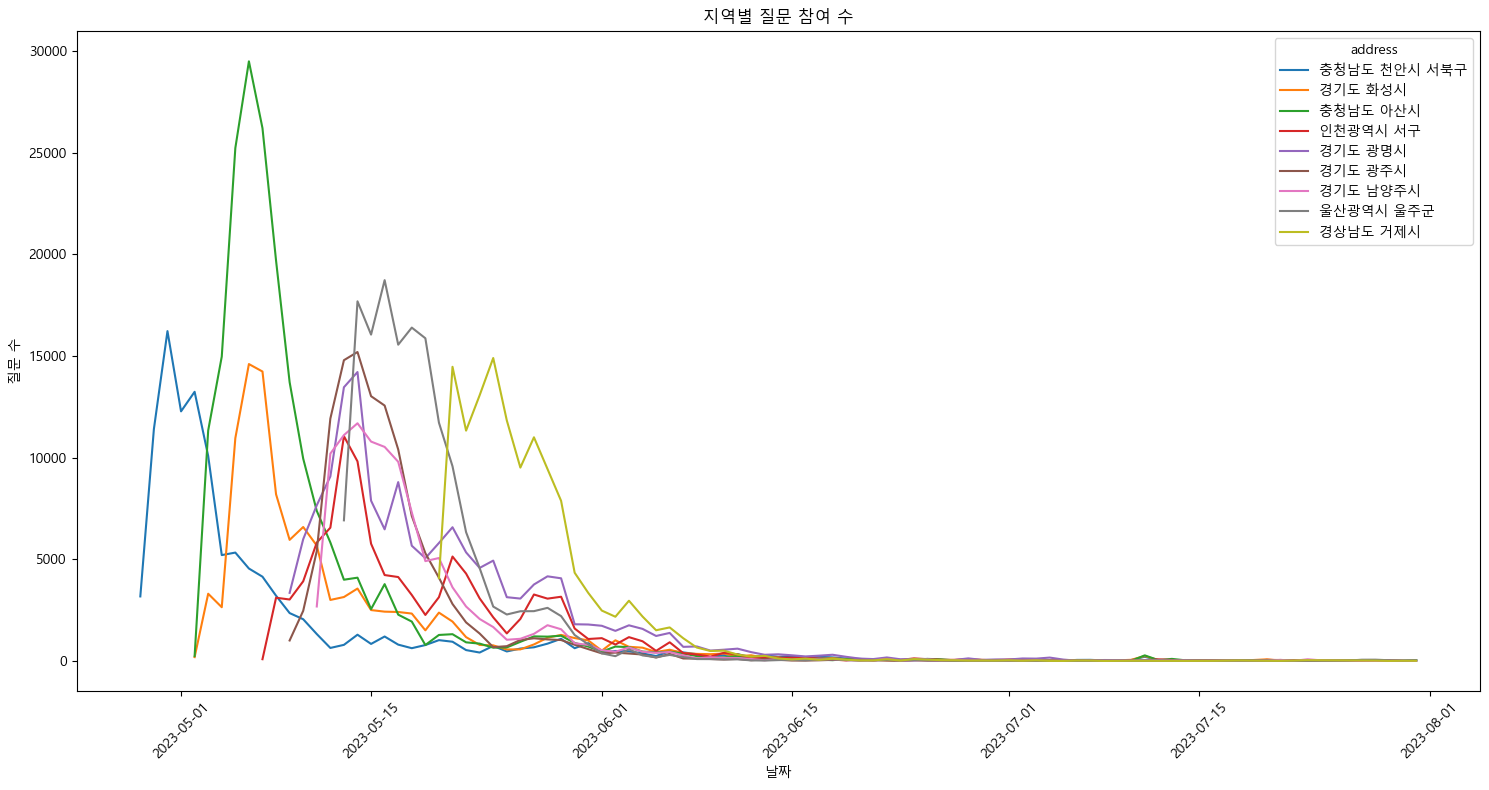

In [21]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# 첫 번째 y축 (질문 수)
sns.lineplot(data=daily_question_count, x='date', y='count', hue='address')
ax1.set_ylabel("질문 수")

# 공통 설정
ax1.set_title("지역별 질문 참여 수")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

In [22]:
del accounts_group_df, accounts_school_df, accounts_user_df, accounts_userquestionrecord_df, merged, daily_question_count

# **지역별 가입자 수 추이**

In [23]:
# 유저 테이블
accounts_user_df = load_data_from_bigquery("SELECT id, created_at, group_id FROM votes.accounts_user WHERE created_at < '2023-08-01';")
display(accounts_user_df)

# 학교 테이블
accounts_school_df = load_data_from_bigquery("SELECT * FROM votes.accounts_school;")
display(accounts_school_df)

# 학급 테이블
accounts_group_df = load_data_from_bigquery("SELECT * FROM votes.accounts_group;")
display(accounts_group_df)

Downloading: 100%|██████████|


,id,created_at,group_id
0,831956,2023-03-29 03:44:14.047130,NaN
1,831962,2023-03-29 05:18:56.162368,12.0
2,832151,2023-03-29 12:56:34.989468,1.0
3,832340,2023-03-29 12:56:35.020790,1.0
4,832520,2023-03-29 12:56:35.049311,12.0
...,...,...,...
673179,1579640,2023-07-31 16:40:15.522415,81557.0
673180,1579641,2023-07-31 16:48:48.598009,32088.0
673181,1579642,2023-07-31 16:52:27.877076,10260.0
673182,1579643,2023-07-31 17:48:00.152054,28720.0


Downloading: 100%|██████████|


,id,address,student_count,school_type
0,4,충청북도 충주시,239,H
1,6,충청북도 충주시,200,H
2,7,충청북도 충주시,114,H
3,13,충청북도 충주시,80,H
4,16,충청북도 충주시,143,H
...,...,...,...,...
5946,4971,경기도 안성시,155,M
5947,5025,경기도 안산시 단원구,155,M
5948,5063,경기도 시흥시,155,M
5949,5336,경기도 부천시,155,M


Downloading: 100%|██████████|


,id,grade,class_num,school_id
0,1,1,1,1
1,227,1,20,1
2,660,1,7,1
3,1184,1,5,1
4,1191,1,8,1
...,...,...,...,...
84510,73315,3,1,5961
84511,82152,3,1,5963
84512,84171,3,1,5965
84513,32644,4,10,4658


In [24]:
accounts_user_df['id'] = accounts_user_df['id'].astype('int64')
accounts_group_df['id'] = accounts_group_df['id'].astype('int64')
accounts_group_df['school_id'] = accounts_group_df['school_id'].astype('int64')
accounts_school_df['id'] = accounts_school_df['id'].astype('int64')

merged = accounts_user_df.merge(accounts_group_df, left_on='group_id', right_on='id')\
            .merge(accounts_school_df, left_on='school_id', right_on='id')

display(merged)

,id_x,created_at,group_id,id_y,grade,class_num,school_id,id,address,student_count,school_type
0,833024,2023-03-31 09:05:51.903699,35.0,35,1,10,5464,5464,경기도 군포시,158,H
1,1005101,2023-05-08 11:17:03.922400,35.0,35,1,10,5464,5464,경기도 군포시,158,H
2,1190758,2023-05-13 00:47:22.271190,35.0,35,1,10,5464,5464,경기도 군포시,158,H
3,1230027,2023-05-13 14:28:32.373961,35.0,35,1,10,5464,5464,경기도 군포시,158,H
4,1236559,2023-05-13 16:16:35.623913,35.0,35,1,10,5464,5464,경기도 군포시,158,H
...,...,...,...,...,...,...,...,...,...,...,...
673092,1577919,2023-07-08 12:53:25.827262,83916.0,83916,3,1,3532,3532,경상북도 포항시 북구,1,M
673093,1579162,2023-07-20 12:49:32.065000,84010.0,84010,2,1,5949,5949,-,1,H
673094,1579415,2023-07-25 06:17:05.602619,84036.0,84036,2,2,677,677,전라북도 전주시 완산구,1,H
673095,1579448,2023-07-25 16:12:36.906006,84039.0,84039,1,1,1086,1086,전라남도 영암군,1,H


In [25]:
# 전국 단위의 광역시도 기준으로 count
merged['address'] = merged['address'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)

# 주소 앞 자리에 '대한민국' 을 포함하는 경우 그 데이터를 삭제 후 주소 표기
merged['address'] = merged['address'].apply(
    lambda x: x.replace('대한민국', '').strip() if isinstance(x, str) else x
)

# 전국 단위로 입력되어 있는 데이터가 축약 표시로 되어 있다면, 풀어서 표시 (예시 : 경남 -> 경상남도)
province_map = {
    '서울': '서울특별시',
    '부산': '부산광역시',
    '대구': '대구광역시',
    '인천': '인천광역시',
    '광주': '광주광역시',
    '대전': '대전광역시',
    '울산': '울산광역시',
    '세종': '세종특별자치시',
    '경기': '경기도',
    '강원': '강원도',
    '충북': '충청북도',
    '충남': '충청남도',
    '전북': '전라북도',
    '전남': '전라남도',
    '경북': '경상북도',
    '경남': '경상남도',
    '제주': '제주특별자치도'
}

merged['address'] = merged['address'].map(province_map).fillna(merged['address'])

# created_at 기준으로 데이터 groupby
user_count_by_area = (
    merged
    .assign(date=merged['created_at'].dt.date)
    .groupby(['date', 'address'])
    .size()
).reset_index(name='count')

# address가 '-' 인 데이터 삭제
user_count_by_area = user_count_by_area[user_count_by_area['address'] != '-']

display(user_count_by_area)

,date,address,count
0,2023-03-31,경기도,1
1,2023-03-31,충청남도,21
2,2023-04-01,경기도,2
3,2023-04-01,충청남도,14
4,2023-04-02,충청남도,1
...,...,...,...
1557,2023-07-31,대전광역시,2
1558,2023-07-31,부산광역시,1
1559,2023-07-31,서울특별시,4
1560,2023-07-31,인천광역시,3


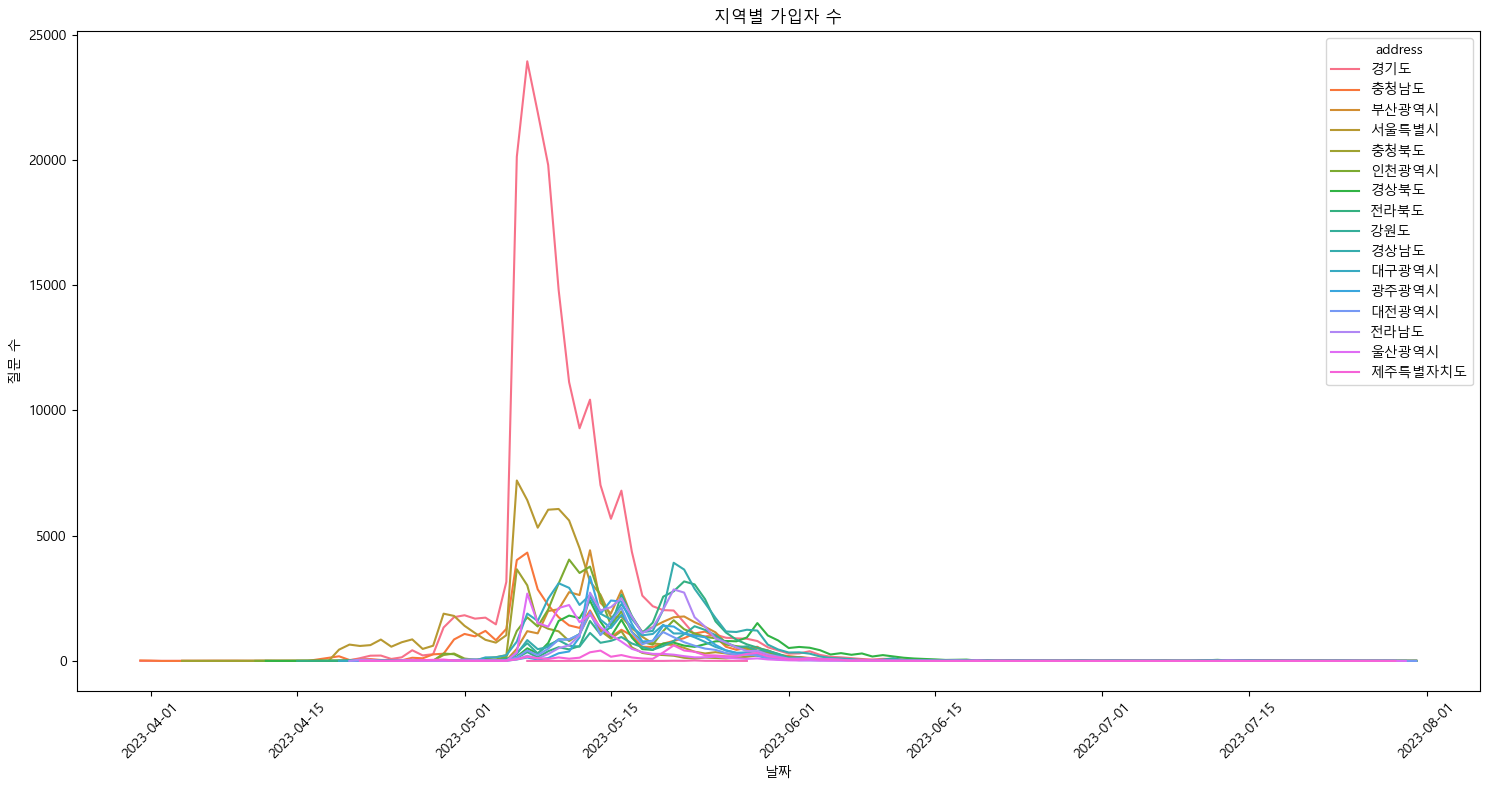

In [26]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# 첫 번째 y축 (질문 수)
sns.lineplot(data=user_count_by_area, x='date', y='count', hue='address')
ax1.set_ylabel("질문 수")

# 공통 설정
ax1.set_title("지역별 가입자 수")
ax1.set_xlabel("날짜")
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

In [37]:
del accounts_group_df, accounts_school_df, accounts_user_df, merged, province_map, user_count_by_area

# **유저 신고 관련 파헤치기**

In [27]:
timelinereport_df = load_data_from_bigquery("SELECT * FROM votes.accounts_timelinereport;")

Downloading: 100%|██████████|


In [28]:
questionset_df = load_data_from_bigquery("SELECT * FROM votes.polls_questionset")

Downloading: 100%|██████████|


In [29]:
userquestionrecord_df = load_data_from_bigquery("SELECT * FROM votes.accounts_userquestionrecord;")

Downloading: 100%|██████████|


In [30]:
timelinereport_df['reason'].unique()

array(['광고', '선정적이거나 폭력적인 내용', '친구를 비하하거나 조롱하는 어투', '타인을 사칭함', '허위 사실 언급'],
      dtype=object)

In [31]:
timelinereport_df[timelinereport_df['reason'] == '허위 사실 언급']

,id,reason,created_at,reported_user_id,user_id,user_question_record_id
128,64,허위 사실 언급,2023-05-06 07:07:46,888610,893684,4143049
129,65,허위 사실 언급,2023-05-06 07:07:52,888610,893684,4143049
130,73,허위 사실 언급,2023-05-06 07:24:39,884536,895569,4198891
131,86,허위 사실 언급,2023-05-06 07:49:27,895726,887254,4210703
132,145,허위 사실 언급,2023-05-06 09:28:26,876060,887254,4265440
...,...,...,...,...,...,...
203,17844,허위 사실 언급,2023-05-23 22:50:21,1408262,1401647,102133321
204,21606,허위 사실 언급,2023-05-29 11:39:09,1479859,1402487,129879776
205,21761,허위 사실 언급,2023-05-29 14:09:03,1448785,1460473,130511263
206,22634,허위 사실 언급,2023-05-31 10:33:00,1551005,1161757,135982670


In [32]:
questionset_df['question_piece_id_list'] = questionset_df['question_piece_id_list'].apply(ast.literal_eval)
questionset_df = questionset_df.explode(column='question_piece_id_list')

In [33]:
questionset_df['question_piece_id_list'] = questionset_df['question_piece_id_list'].astype(int)

In [34]:
# for문을 돌리기 위한 리스트 생성
reason = '허위 사실 언급'

user_id_list = timelinereport_df[timelinereport_df['reason'] == reason]['user_id'].to_list()
user_question_record_id_list = timelinereport_df[timelinereport_df['reason'] == reason]['user_question_record_id'].to_list()

count = 1
for user_id, user_question_record_id in zip(user_id_list, user_question_record_id_list):
    # 해당 user_question_record_id를 참조하여 question_piece_id를 검색
    question_piece_id = userquestionrecord_df[userquestionrecord_df['id'] == user_question_record_id]['question_piece_id'].values[0]

    # 테스트 데이터프레임 생성
    test_df = questionset_df[
        (questionset_df['user_id'] == user_id) &
        (questionset_df['question_piece_id_list'] == question_piece_id)
    ]

    # 데이터프레임이 비어있는지 확인
    is_matched = not test_df.empty

    if is_matched:
        # 조건을 만족하는 경우 실행할 코드
        print(f"user_id {user_id} matched with question_piece_id {question_piece_id}")
        display(test_df)
        print(f"count : {count}")
        count += 1

user_id 893684 matched with question_piece_id 5325978


,id,question_piece_id_list,opening_time,status,created_at,user_id
48144,532569,5325978,2023-05-06 05:51:57,F,2023-05-06 05:01:57,893684


count : 1
user_id 893684 matched with question_piece_id 5325978


,id,question_piece_id_list,opening_time,status,created_at,user_id
48144,532569,5325978,2023-05-06 05:51:57,F,2023-05-06 05:01:57,893684


count : 2
user_id 887254 matched with question_piece_id 5415314


,id,question_piece_id_list,opening_time,status,created_at,user_id
44446,541502,5415314,2023-05-06 07:32:57,F,2023-05-06 06:42:57,887254


count : 3
user_id 887254 matched with question_piece_id 5466870


,id,question_piece_id_list,opening_time,status,created_at,user_id
44447,546658,5466870,2023-05-06 08:26:29,F,2023-05-06 07:36:29,887254


count : 4
user_id 878909 matched with question_piece_id 5565074


,id,question_piece_id_list,opening_time,status,created_at,user_id
31107,556478,5565074,2023-05-06 09:15:48,F,2023-05-06 08:25:48,878909


count : 5
user_id 885300 matched with question_piece_id 5615398


,id,question_piece_id_list,opening_time,status,created_at,user_id
40360,561511,5615398,2023-05-06 09:37:58,F,2023-05-06 08:47:58,885300


count : 6
user_id 1002212 matched with question_piece_id 16721421


,id,question_piece_id_list,opening_time,status,created_at,user_id
59299,1672113,16721421,2023-05-09 08:49:33,F,2023-05-09 08:49:33,1002212


count : 7
user_id 1115498 matched with question_piece_id 28026908


,id,question_piece_id_list,opening_time,status,created_at,user_id
76714,2802662,28026908,2023-05-11 03:01:53,F,2023-05-11 02:11:53,1115498


count : 8
user_id 1115498 matched with question_piece_id 28026908


,id,question_piece_id_list,opening_time,status,created_at,user_id
76714,2802662,28026908,2023-05-11 03:01:53,F,2023-05-11 02:11:53,1115498


count : 9
user_id 1131924 matched with question_piece_id 32407037


,id,question_piece_id_list,opening_time,status,created_at,user_id
80622,3240669,32407037,2023-05-11 14:55:08,F,2023-05-11 14:05:08,1131924


count : 10
user_id 1137878 matched with question_piece_id 35091624


,id,question_piece_id_list,opening_time,status,created_at,user_id
82298,3509133,35091624,2023-05-12 01:27:38,F,2023-05-12 00:47:38,1137878


count : 11
user_id 1190082 matched with question_piece_id 53383277


,id,question_piece_id_list,opening_time,status,created_at,user_id
99769,5338297,53383277,2023-05-14 02:29:39,F,2023-05-14 01:49:39,1190082


count : 12
user_id 1216979 matched with question_piece_id 62656089


,id,question_piece_id_list,opening_time,status,created_at,user_id
106879,6265577,62656089,2023-05-14 23:57:32,F,2023-05-14 23:17:32,1216979


count : 13
user_id 866940 matched with question_piece_id 58888958


,id,question_piece_id_list,opening_time,status,created_at,user_id
15810,5888867,58888958,2023-05-14 12:27:53,F,2023-05-14 11:47:53,866940


count : 14
user_id 866940 matched with question_piece_id 58888958


,id,question_piece_id_list,opening_time,status,created_at,user_id
15810,5888867,58888958,2023-05-14 12:27:53,F,2023-05-14 11:47:53,866940


count : 15
user_id 1296100 matched with question_piece_id 74752610


,id,question_piece_id_list,opening_time,status,created_at,user_id
122121,7475230,74752610,2023-05-16 11:22:40,F,2023-05-16 10:42:40,1296100


count : 16
user_id 881335 matched with question_piece_id 79058414


,id,question_piece_id_list,opening_time,status,created_at,user_id
34360,7905813,79058414,2023-05-16 22:52:46,F,2023-05-16 22:12:47,881335


count : 17
user_id 1169723 matched with question_piece_id 84727709


,id,question_piece_id_list,opening_time,status,created_at,user_id
94491,8472742,84727709,2023-05-17 12:50:40,F,2023-05-17 12:10:40,1169723


count : 18
user_id 1343904 matched with question_piece_id 104740682


,id,question_piece_id_list,opening_time,status,created_at,user_id
126724,10474038,104740682,2023-05-20 07:27:55,F,2023-05-20 06:47:56,1343904


count : 19
user_id 1257994 matched with question_piece_id 109069053


,id,question_piece_id_list,opening_time,status,created_at,user_id
115111,10906876,109069053,2023-05-20 16:09:50,F,2023-05-20 15:29:50,1257994


count : 20
user_id 1253264 matched with question_piece_id 112172199


,id,question_piece_id_list,opening_time,status,created_at,user_id
114261,11217191,112172199,2023-05-21 05:55:14,F,2023-05-21 05:15:15,1253264


count : 21
user_id 1319092 matched with question_piece_id 95722203


,id,question_piece_id_list,opening_time,status,created_at,user_id
157480,9572191,95722203,2023-05-19 00:03:59,O,2023-05-18 23:23:59,1319092


count : 22
user_id 1319092 matched with question_piece_id 95722203


,id,question_piece_id_list,opening_time,status,created_at,user_id
157480,9572191,95722203,2023-05-19 00:03:59,O,2023-05-18 23:23:59,1319092


count : 23
user_id 1401647 matched with question_piece_id 131047654


,id,question_piece_id_list,opening_time,status,created_at,user_id
132986,13104736,131047654,2023-05-23 20:49:06,F,2023-05-23 20:09:06,1401647


count : 24


In [35]:
userquestionrecord_df[userquestionrecord_df['id'] == 28992803]['question_piece_id'].values[0]

38127700

In [36]:
userquestionrecord_df[['question_piece_id']].merge(
    questionset_df[['question_piece_id_list']],
    how='inner',
    left_on='question_piece_id',
    right_on='question_piece_id_list').drop_duplicates(subset='question_piece_id')

,question_piece_id,question_piece_id_list
0,1213085,1213085
1,1235436,1235436
2,1395859,1395859
3,1509130,1509130
4,1511169,1511169
...,...,...
1217553,207529811,207529811
1217554,205058859,205058859
1217555,208157659,208157659
1217556,195433327,195433327


## **결론**

### 유저 신고를 하는 과정

1. 어떤 유저가 질문셋에 들어가서 투표를 함
2. 맘에 안드는 게 있음
3. 그럼 그 유저를 신고한다

유저를 신고하는 과정은 투표 중에 진행되지만, **해당 유저와 매칭이 되는 경우가 많이 없었음**

**즉, `votes.timelinereport` 테이블은 생각보다 오류가 많다.**

다른 방면에서도 신고를 할 수 있는 것으로 보이지만, 이를 파악하기 위해 hackle 데이터를 볼려 했으나... hackle에는 신고로 넘어가는 이벤트 발생건이 존재하지 않아서 포기

# **투표한 유저의 리텐션 (by 금희)**

In [38]:
userquestionrecord_df = load_data_from_bigquery("SELECT * FROM votes.accounts_userquestionrecord;")

Downloading: 100%|██████████|


In [39]:
userquestionrecord_df.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3
1,978922,I,2023-04-29 14:49:06,849922,180,849450,1235436,1,N,2023-04-29 14:49:06,0,3
2,1095692,I,2023-04-30 03:29:48,850031,132,850229,1395859,1,N,2023-04-30 03:29:48,0,3
3,1167181,I,2023-04-30 07:43:10,856172,116,857422,1509130,1,N,2023-04-30 07:43:10,0,3
4,1171173,I,2023-04-30 07:58:36,855039,132,855117,1511169,1,N,2023-04-30 07:58:36,0,3


In [40]:
# 투표 날짜 컬럼 년-월-일로 생성
userquestionrecord_df = userquestionrecord_df.copy()
userquestionrecord_df['vote_date'] = userquestionrecord_df['created_at'].dt.date

In [41]:
userquestionrecord_df.head()

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,vote_date
0,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3,2023-04-29
1,978922,I,2023-04-29 14:49:06,849922,180,849450,1235436,1,N,2023-04-29 14:49:06,0,3,2023-04-29
2,1095692,I,2023-04-30 03:29:48,850031,132,850229,1395859,1,N,2023-04-30 03:29:48,0,3,2023-04-30
3,1167181,I,2023-04-30 07:43:10,856172,116,857422,1509130,1,N,2023-04-30 07:43:10,0,3,2023-04-30
4,1171173,I,2023-04-30 07:58:36,855039,132,855117,1511169,1,N,2023-04-30 07:58:36,0,3,2023-04-30


In [42]:
# 각 유저별 일별 투표 수 및 순서(투표 순서)

#  유저별 + 날짜별 투표 수 집계
user_daily_vote_df = (
    userquestionrecord_df
    .groupby(['user_id', 'vote_date'])
    .size()
    .reset_index(name='daily_vote_count')
)
# 유저별 투표 날짜 순 정렬
user_daily_vote_df = user_daily_vote_df.sort_values(['user_id', 'vote_date'])

# 유저별로 투표 순서 번호 붙이기
user_daily_vote_df['vote_sequence'] = (
    user_daily_vote_df
    .groupby('user_id')
    .cumcount() + 1  # 0부터 시작하므로 +1
)

user_daily_vote_df

,user_id,vote_date,daily_vote_count,vote_sequence
0,838023,2023-04-29,1,1
1,838023,2023-04-30,6,2
2,838023,2023-05-02,1,3
3,838023,2023-05-03,10,4
4,838023,2023-05-04,4,5
...,...,...,...,...
50969,1579418,2023-07-29,7,4
50970,1579418,2023-07-30,1,5
50971,1579418,2023-08-05,8,6
50972,1580578,2023-09-20,2,1


In [43]:
# 1. first_vote_date 기준으로 코호트 날짜 설정(유저별로 첫 투표 날짜(min))
vote_df = user_daily_vote_df.copy()
vote_df['first_vote_date'] = vote_df.groupby('user_id')['vote_date'].transform('min')

# 2. 가입일 기준 n일차 계산(첫날은 0일)
vote_df['day_n'] = (pd.to_datetime(vote_df['vote_date']) - pd.to_datetime(vote_df['first_vote_date'])).dt.days

# 3. 유저 수 집계 (코호트일, day_n 기준으로 몇 명이 활동했는가)
cohort_table = (
    vote_df
    .groupby(['first_vote_date', 'day_n'])['user_id']
    .nunique()
    .reset_index()
    .rename(columns={'user_id': 'active_users'})
)

# 4. 코호트별 전체 유저 수 (Day 0 기준 유입자 수(해당 날짜가 첫 투표일임))
cohort_sizes = (
    cohort_table[cohort_table['day_n'] == 0]
    .rename(columns={'active_users': 'cohort_size'})[['first_vote_date', 'cohort_size']]
)

# 5. 병합하여 리텐션율 계산
cohort_table = cohort_table.merge(cohort_sizes, on='first_vote_date')
cohort_table['retention_rate'] = (cohort_table['active_users'] / cohort_table['cohort_size'] * 100).round(2)

# 6. 피벗 테이블 변환
cohort_retention = cohort_table.pivot(index='first_vote_date', columns='day_n', values='retention_rate').fillna(0)

# 7. 각 코호트별 투표 유저 수 추가

In [44]:
# 6월 첫째주까지 남은 피봇 다시 생성하기
cohort_retention

day_n,0,1,2,3,4,5,6,7,8,9,...,335,338,342,344,345,357,360,364,369,375
first_vote_date,,,,,,,,,,,,,,,,,,,,,
2023-04-28,100.0,97.60,90.40,80.80,90.40,72.00,61.60,60.00,56.00,48.80,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-04-29,100.0,98.99,85.86,89.90,83.84,67.68,63.64,64.65,51.52,45.45,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.01
2023-04-30,100.0,90.35,94.74,89.47,69.30,70.18,71.93,57.02,52.63,54.39,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-01,100.0,86.11,83.33,63.89,72.22,55.56,63.89,58.33,44.44,30.56,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-02,100.0,94.44,83.33,83.33,83.33,81.94,62.50,56.94,56.94,43.06,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-03,100.0,90.60,92.17,87.73,82.25,68.41,60.84,50.13,42.30,33.16,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.00
2023-05-04,100.0,92.81,90.42,83.83,63.47,55.69,49.70,41.92,33.53,23.95,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-05,100.0,93.81,85.78,75.92,59.40,56.88,43.81,37.61,31.65,33.49,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-06,100.0,88.52,81.42,71.04,57.38,54.10,38.25,35.52,32.79,24.59,...,0.0,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [45]:
#  cohort_sizes의 first_vote_date 데이터 타입 변환
cohort_sizes['first_vote_date'] = pd.to_datetime(cohort_sizes['first_vote_date'])

# 1. cohort_retention의 index도 datetime 형식으로 재확인
cohort_retention.index = pd.to_datetime(cohort_retention.index)

# 2. cohort_sizes를 index로 변환
cohort_sizes_indexed = cohort_sizes.set_index('first_vote_date')

# 3. 정확히 병합 (index 기준)
retention = pd.concat([cohort_retention, cohort_sizes_indexed], axis=1)

# 4. 날짜 컬럼 순서 정리
day_cols = sorted([col for col in retention.columns if isinstance(col, int)])
final_cols = ['cohort_size'] + day_cols
retention = retention[final_cols]

In [46]:
retention

,cohort_size,0,1,2,3,4,5,6,7,8,...,335,338,342,344,345,357,360,364,369,375
first_vote_date,,,,,,,,,,,,,,,,,,,,,
2023-04-28,125,100.0,97.60,90.40,80.80,90.40,72.00,61.60,60.00,56.00,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-04-29,99,100.0,98.99,85.86,89.90,83.84,67.68,63.64,64.65,51.52,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.01
2023-04-30,114,100.0,90.35,94.74,89.47,69.30,70.18,71.93,57.02,52.63,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-01,36,100.0,86.11,83.33,63.89,72.22,55.56,63.89,58.33,44.44,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-02,72,100.0,94.44,83.33,83.33,83.33,81.94,62.50,56.94,56.94,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-03,383,100.0,90.60,92.17,87.73,82.25,68.41,60.84,50.13,42.30,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.26,0.00
2023-05-04,167,100.0,92.81,90.42,83.83,63.47,55.69,49.70,41.92,33.53,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-05,436,100.0,93.81,85.78,75.92,59.40,56.88,43.81,37.61,31.65,...,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2023-05-06,183,100.0,88.52,81.42,71.04,57.38,54.10,38.25,35.52,32.79,...,0.0,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [47]:
# 1. first_vote_date가 5월 25일 이하인 것만 필터
retention = retention[retention.index <= '2023-05-25']

# 2. day_n이 30 이하인 컬럼만 남기기
filtered_day_cols = [col for col in day_cols if col <= 30]
final_cols = ['cohort_size'] + filtered_day_cols
retention = retention[final_cols]

In [48]:
retention

,cohort_size,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
first_vote_date,,,,,,,,,,,,,,,,,,,,,
2023-04-28,125,100.0,97.60,90.40,80.80,90.40,72.00,61.60,60.00,56.00,...,11.20,9.60,12.00,6.40,5.60,8.00,8.80,7.20,10.40,6.40
2023-04-29,99,100.0,98.99,85.86,89.90,83.84,67.68,63.64,64.65,51.52,...,8.08,7.07,5.05,2.02,6.06,2.02,7.07,15.15,17.17,14.14
2023-04-30,114,100.0,90.35,94.74,89.47,69.30,70.18,71.93,57.02,52.63,...,17.54,13.16,14.04,14.91,14.04,15.79,13.16,22.81,22.81,14.04
2023-05-01,36,100.0,86.11,83.33,63.89,72.22,55.56,63.89,58.33,44.44,...,16.67,5.56,16.67,13.89,25.00,22.22,16.67,22.22,22.22,22.22
2023-05-02,72,100.0,94.44,83.33,83.33,83.33,81.94,62.50,56.94,56.94,...,20.83,12.50,12.50,12.50,23.61,20.83,25.00,16.67,9.72,5.56
2023-05-03,383,100.0,90.60,92.17,87.73,82.25,68.41,60.84,50.13,42.30,...,7.83,6.01,8.09,12.53,13.84,14.36,9.66,8.09,6.79,10.97
2023-05-04,167,100.0,92.81,90.42,83.83,63.47,55.69,49.70,41.92,33.53,...,5.39,6.59,10.18,6.59,7.78,4.19,3.59,3.59,8.38,2.99
2023-05-05,436,100.0,93.81,85.78,75.92,59.40,56.88,43.81,37.61,31.65,...,8.03,13.76,13.07,13.07,6.88,6.42,5.50,8.49,6.42,4.82
2023-05-06,183,100.0,88.52,81.42,71.04,57.38,54.10,38.25,35.52,32.79,...,13.66,6.56,8.74,6.01,8.20,2.19,6.01,4.37,3.28,4.37


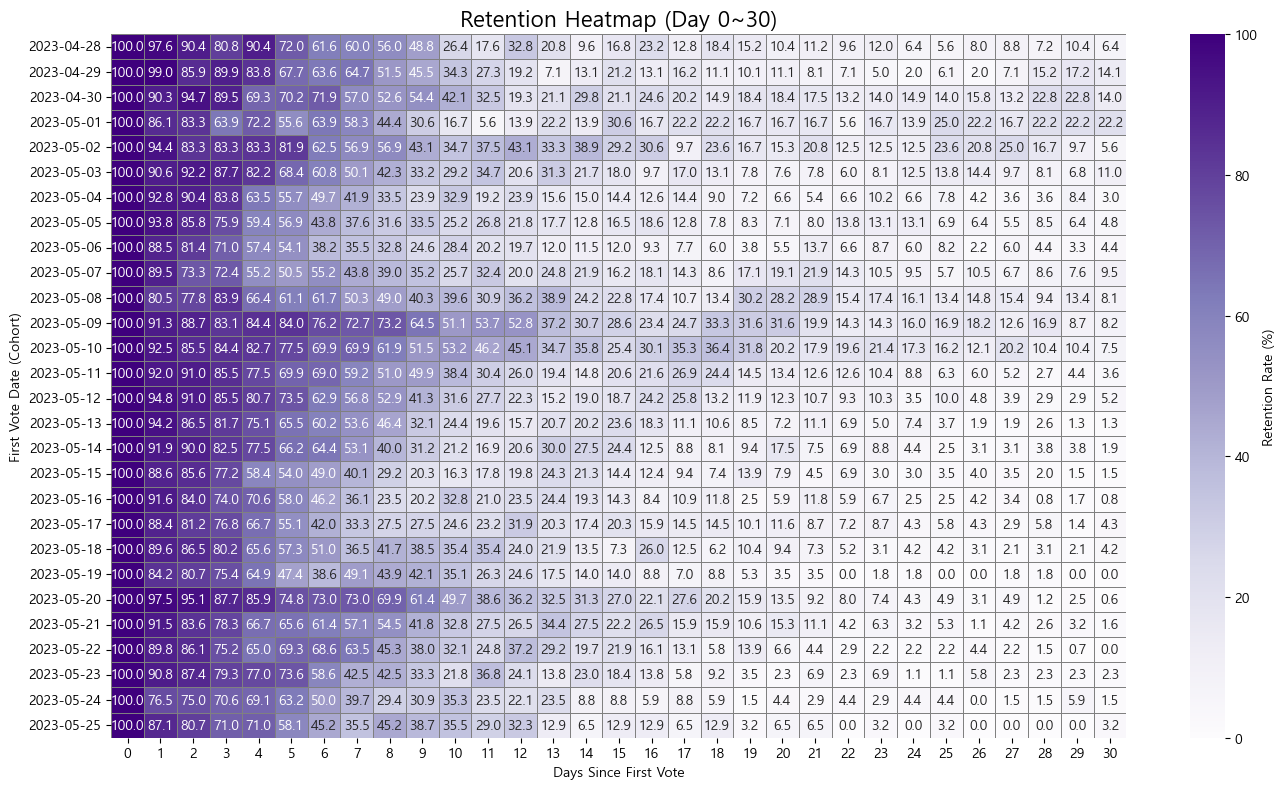

In [49]:
# 히트맵 대상: cohort_size 제외한 day_n 컬럼만 선택
heatmap_data = retention.drop(columns='cohort_size')

# 인덱스를 날짜 문자열로 변환 (시간 제거)
heatmap_data.index = heatmap_data.index.strftime('%Y-%m-%d')

# 히트맵 그리기
plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    annot=True, fmt=".1f", cmap="Purples", linewidths=0.5, linecolor='gray',
    cbar_kws={'label': 'Retention Rate (%)'}
)

plt.title('Retention Heatmap (Day 0~30)', fontsize=16)
plt.xlabel('Days Since First Vote')
plt.ylabel('First Vote Date (Cohort)')
plt.tight_layout()
plt.show()

# **콘텐츠 유형에 따른 재투표율**

In [58]:
userquestionrecord_df = load_data_from_bigquery("SELECT * FROM votes.accounts_userquestionrecord;")
polls_questionpiece_df = load_data_from_bigquery("SELECT * FROM votes.polls_questionpiece;")
polls_question_add_category_df = load_data_from_bigquery("SELECT * FROM votes.polls_question_add_category;")

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [59]:
display(userquestionrecord_df)
display(polls_questionpiece_df)
display(polls_question_add_category_df)

,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3
1,978922,I,2023-04-29 14:49:06,849922,180,849450,1235436,1,N,2023-04-29 14:49:06,0,3
2,1095692,I,2023-04-30 03:29:48,850031,132,850229,1395859,1,N,2023-04-30 03:29:48,0,3
3,1167181,I,2023-04-30 07:43:10,856172,116,857422,1509130,1,N,2023-04-30 07:43:10,0,3
4,1171173,I,2023-04-30 07:58:36,855039,132,855117,1511169,1,N,2023-04-30 07:58:36,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1217553,161153946,I,2023-09-24 07:29:33,1469364,2117,1521099,207529811,1,N,2023-09-24 07:29:33,0,2
1217554,161365056,I,2023-10-19 13:40:14,1417450,151,1426631,205058859,1,N,2023-10-19 13:40:14,0,2
1217555,161519729,I,2023-12-02 02:12:09,1014480,1594,1208878,208157659,1,N,2023-12-02 02:12:09,0,2
1217556,161521676,I,2023-12-02 16:43:05,1167481,3546,953390,195433327,1,N,2023-12-02 16:43:05,0,2


,id,is_voted,created_at,question_id,is_skipped
0,998459,1,2023-04-28 12:27:22,244,0
1,998461,1,2023-04-28 12:27:22,101,0
2,998588,1,2023-04-28 12:28:07,237,0
3,998590,1,2023-04-28 12:28:07,184,0
4,998591,1,2023-04-28 12:28:07,157,0
...,...,...,...,...,...
1265471,208385211,0,2024-05-07 11:29:08,1970,0
1265472,208385213,0,2024-05-07 11:29:08,941,0
1265473,208385214,0,2024-05-07 11:29:08,3306,0
1265474,208385225,0,2024-05-07 11:32:30,4534,0


,id,question_text,created_at,category
0,99,가장 신비한 매력이 있는 사람은?,2023-03-31 15:22:53,"[연애, 성격, 감성]"
1,100,"""이 사람으로 한 번 살아보고 싶다"" 하는 사람은?",2023-03-31 15:22:53,"[심리, 상상, 인간관계]"
2,101,미래의 틱톡커는?,2023-03-31 15:22:54,"[미디어, 미래, 상상]"
3,102,여기서 제일 특이한 친구는?,2023-03-31 15:22:54,"[성격, 관찰, 인간관계]"
4,103,가장 지켜주고 싶은 사람은?,2023-03-31 15:22:55,"[심리, 일상, 인간관계]"
...,...,...,...,...
5020,5129,나에게 가장 중요한 사람은?,2023-06-06 06:15:52,"[심리, 일상, 인간관계]"
5021,5130,오목을 제일 잘 할 것 같은 사람은?,2023-06-06 06:15:52,"[일상, 지식, 관찰]"
5022,5131,가방에서 쓰레기가 안 나올 것 같은 사람은?,2023-06-06 06:15:52,"[일상, 성격, 관찰]"
5023,5132,아무리 많은 숙제도 30분만에 다 끝내버릴 수 있을 것 같은 친구는?,2023-06-06 06:15:52,"[일상, 성격, 관찰]"


In [72]:
# question_id 기준 데이터 중복 확인
display(polls_questionpiece_df.drop_duplicates(subset=['question_id']))

# 중복제거한 polls_questionpiece를 통한 데이터 병합
temp = pd.merge(
        polls_questionpiece_df.drop(labels=['created_at'], axis=1),
        polls_question_add_category_df.drop(labels=['created_at'], axis=1),
        how='left',
        left_on='question_id',
        right_on='id'
    ).drop(labels=['id_y'], axis=1)

# 데이터 확인
display(temp)

# 데이터 총 병합
merged = pd.merge(
    userquestionrecord_df,
    temp,
    how='left',
    left_on='question_piece_id',
    right_on='id_x'
)

# 병합 데이터 확인
display(merged.dropna())

,id,is_voted,created_at,question_id,is_skipped
0,998459,1,2023-04-28 12:27:22,244,0
1,998461,1,2023-04-28 12:27:22,101,0
2,998588,1,2023-04-28 12:28:07,237,0
3,998590,1,2023-04-28 12:28:07,184,0
4,998591,1,2023-04-28 12:28:07,157,0
...,...,...,...,...,...
1264867,207820234,1,2023-10-05 13:38:40,4287,0
1265017,208022230,1,2023-11-06 16:08:15,4507,0
1265113,208162002,1,2023-12-03 04:22:35,5093,0
1265214,208208959,1,2023-12-17 14:46:43,4477,0


,id_x,is_voted,question_id,is_skipped,question_text,category
0,998459,1,244,0,대학교에서 학생회장할 것 같은 사람은?,"[일상, 성격, 인간관계]"
1,998461,1,101,0,미래의 틱톡커는?,"[미디어, 미래, 상상]"
2,998588,1,237,0,이별 후 자기가 먼저 화해메시지 보낼 것 같은 사람?,"[연애, 심리, 인간관계]"
3,998590,1,184,0,랩을 제일 잘할것 같은 사람은?,"[미디어, 상상, 스타일]"
4,998591,1,157,0,나에게 항상 응원과 용기를 주는 사람은?,"[심리, 감성, 인간관계]"
...,...,...,...,...,...,...
1265471,208385211,0,1970,0,주말에 같이 놀고 싶은 사람,"[연애, 일상, 인간관계]"
1265472,208385213,0,941,0,사귀고 싶은 사람은?,"[연애, 상상, 인간관계]"
1265473,208385214,0,3306,0,이성에게 철벽 칠 것 같은 친구는?,"[연애, 성격, 인간관계]"
1265474,208385225,0,4534,0,시험 0점 맞아도 웃고있을 것 같은 사람,"[심리, 일상, 성격]"


,id,status,created_at,chosen_user_id,question_id_x,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,id_x,is_voted,question_id_y,is_skipped,question_text,category
0,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3,1213085,1,132,0,내 이상형과 가장 가까운 사람은?,"[연애, 심리, 인간관계]"
1,978922,I,2023-04-29 14:49:06,849922,180,849450,1235436,1,N,2023-04-29 14:49:06,0,3,1235436,1,180,0,볼수록 매력있는 사람은?,"[성격, 관찰, 인간관계]"
2,1095692,I,2023-04-30 03:29:48,850031,132,850229,1395859,1,N,2023-04-30 03:29:48,0,3,1395859,1,132,0,내 이상형과 가장 가까운 사람은?,"[연애, 심리, 인간관계]"
3,1167181,I,2023-04-30 07:43:10,856172,116,857422,1509130,1,N,2023-04-30 07:43:10,0,3,1509130,1,116,0,대학가서 용될것 같은 사람은?,"[성격, 미래, 인간관계]"
4,1171173,I,2023-04-30 07:58:36,855039,132,855117,1511169,1,N,2023-04-30 07:58:36,0,3,1511169,1,132,0,내 이상형과 가장 가까운 사람은?,"[연애, 심리, 인간관계]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217553,161153946,I,2023-09-24 07:29:33,1469364,2117,1521099,207529811,1,N,2023-09-24 07:29:33,0,2,207529811,1,2117,0,이별 후 후폭풍 올 것 같은 사람,"[연애, 감성, 심리]"
1217554,161365056,I,2023-10-19 13:40:14,1417450,151,1426631,205058859,1,N,2023-10-19 13:40:14,0,2,205058859,1,151,0,모든 스포츠를 다 잘하는 사람은?,"[일상, 운동, 관찰]"
1217555,161519729,I,2023-12-02 02:12:09,1014480,1594,1208878,208157659,1,N,2023-12-02 02:12:09,0,2,208157659,1,1594,0,이 중 가장 인생을 재미있게 사는 것 같은 친구는?,"[심리, 일상, 라이프스타일]"
1217556,161521676,I,2023-12-02 16:43:05,1167481,3546,953390,195433327,1,N,2023-12-02 16:43:05,0,2,195433327,1,3546,0,카페에서 사진 백만장 찍을 것 같은 사람은??,"[일상, 스타일, 미디어]"


In [73]:
# 병합 데이터 중 category 컬럼 explode
merged_explode = merged.explode(column='category')

# question_text 중 vote 삭제
merged_explode[merged_explode['question_text'] != 'vote']

# 데이터 확인
merged_explode

,id,status,created_at,chosen_user_id,question_id_x,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,id_x,is_voted,question_id_y,is_skipped,question_text,category
0,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3,1213085,1,132,0,내 이상형과 가장 가까운 사람은?,연애
0,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3,1213085,1,132,0,내 이상형과 가장 가까운 사람은?,심리
0,945319,I,2023-04-29 13:22:05,849995,132,851717,1213085,1,P,2023-05-06 10:31:30,0,3,1213085,1,132,0,내 이상형과 가장 가까운 사람은?,인간관계
1,978922,I,2023-04-29 14:49:06,849922,180,849450,1235436,1,N,2023-04-29 14:49:06,0,3,1235436,1,180,0,볼수록 매력있는 사람은?,성격
1,978922,I,2023-04-29 14:49:06,849922,180,849450,1235436,1,N,2023-04-29 14:49:06,0,3,1235436,1,180,0,볼수록 매력있는 사람은?,관찰
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217556,161521676,I,2023-12-02 16:43:05,1167481,3546,953390,195433327,1,N,2023-12-02 16:43:05,0,2,195433327,1,3546,0,카페에서 사진 백만장 찍을 것 같은 사람은??,스타일
1217556,161521676,I,2023-12-02 16:43:05,1167481,3546,953390,195433327,1,N,2023-12-02 16:43:05,0,2,195433327,1,3546,0,카페에서 사진 백만장 찍을 것 같은 사람은??,미디어
1217557,161542253,I,2023-12-10 14:32:37,1196405,2924,1213287,208176263,1,N,2023-12-10 14:32:37,0,2,208176263,1,2924,0,기말고사를 제일 열심히 준비할 것 같은 친구,성격
1217557,161542253,I,2023-12-10 14:32:37,1196405,2924,1213287,208176263,1,N,2023-12-10 14:32:37,0,2,208176263,1,2924,0,기말고사를 제일 열심히 준비할 것 같은 친구,지식


In [81]:
# 희진 : 중심 극한 정리를 활용하기 위해 표분 수가 30명 이상인 기간은 5/1 ~ 5/25
# 기간을 5/1부터 5/25일까지 필터링
merged_explode_filtered = merged_explode[(merged_explode['created_at'] >= '2023-05-01') & (merged_explode['created_at'] <= '2023-05-26')]

# 데이터 확인
merged_explode_filtered

,id,status,created_at,chosen_user_id,question_id_x,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,id_x,is_voted,question_id_y,is_skipped,question_text,category
7,1503745,I,2023-05-01 04:52:05,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3,1775532,1,248,0,목소리가 좋은 사람은?,성격
7,1503745,I,2023-05-01 04:52:05,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3,1775532,1,248,0,목소리가 좋은 사람은?,대화
7,1503745,I,2023-05-01 04:52:05,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3,1775532,1,248,0,목소리가 좋은 사람은?,관찰
8,1681510,I,2023-05-01 12:31:28,863409,143,855748,2106132,1,N,2023-05-01 12:31:28,0,3,2106132,1,143,0,뭔가 스며드는 친구는?,일상
8,1681510,I,2023-05-01 12:31:28,863409,143,855748,2106132,1,N,2023-05-01 12:31:28,0,3,2106132,1,143,0,뭔가 스며드는 친구는?,감성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216494,112553273,I,2023-05-25 23:37:37,1433214,563,1410690,143925241,1,N,2023-05-25 23:37:37,0,2,143925241,1,563,0,모둠활동할 때 버스 태워줄 것 같은 사람은?,성격
1216494,112553273,I,2023-05-25 23:37:37,1433214,563,1410690,143925241,1,N,2023-05-25 23:37:37,0,2,143925241,1,563,0,모둠활동할 때 버스 태워줄 것 같은 사람은?,인간관계
1216495,112553370,I,2023-05-25 23:37:38,1070178,1242,1102028,133063460,1,N,2023-05-25 23:37:38,0,2,133063460,1,1242,0,체육대회 때 고백 받을 것 같은 사람은?,연애
1216495,112553370,I,2023-05-25 23:37:38,1070178,1242,1102028,133063460,1,N,2023-05-25 23:37:38,0,2,133063460,1,1242,0,체육대회 때 고백 받을 것 같은 사람은?,일상


In [82]:
# created_at 컬럼을 dt.date로 변경
merged_explode_filtered['created_at'] = merged_explode_filtered['created_at'].dt.date

# 데이터 확인
merged_explode_filtered

C:\Users\lento\AppData\Local\Temp\ipykernel_22520\1817862805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_explode_filtered['created_at'] = merged_explode_filtered['created_at'].dt.date


,id,status,created_at,chosen_user_id,question_id_x,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times,id_x,is_voted,question_id_y,is_skipped,question_text,category
7,1503745,I,2023-05-01,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3,1775532,1,248,0,목소리가 좋은 사람은?,성격
7,1503745,I,2023-05-01,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3,1775532,1,248,0,목소리가 좋은 사람은?,대화
7,1503745,I,2023-05-01,850031,248,850249,1775532,1,N,2023-05-01 04:52:05,0,3,1775532,1,248,0,목소리가 좋은 사람은?,관찰
8,1681510,I,2023-05-01,863409,143,855748,2106132,1,N,2023-05-01 12:31:28,0,3,2106132,1,143,0,뭔가 스며드는 친구는?,일상
8,1681510,I,2023-05-01,863409,143,855748,2106132,1,N,2023-05-01 12:31:28,0,3,2106132,1,143,0,뭔가 스며드는 친구는?,감성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216494,112553273,I,2023-05-25,1433214,563,1410690,143925241,1,N,2023-05-25 23:37:37,0,2,143925241,1,563,0,모둠활동할 때 버스 태워줄 것 같은 사람은?,성격
1216494,112553273,I,2023-05-25,1433214,563,1410690,143925241,1,N,2023-05-25 23:37:37,0,2,143925241,1,563,0,모둠활동할 때 버스 태워줄 것 같은 사람은?,인간관계
1216495,112553370,I,2023-05-25,1070178,1242,1102028,133063460,1,N,2023-05-25 23:37:38,0,2,133063460,1,1242,0,체육대회 때 고백 받을 것 같은 사람은?,연애
1216495,112553370,I,2023-05-25,1070178,1242,1102028,133063460,1,N,2023-05-25 23:37:38,0,2,133063460,1,1242,0,체육대회 때 고백 받을 것 같은 사람은?,일상
